Establising the problem by analysis of ClinVar PTEN variants
1. increasing number of variants requiring interpretation
2. increasing number of conflicting interpretations
3. increasing number of variants of unknown significance, VUS,  otherwise called 'US'
4. about 80% of classifications are either US or conflicting

Here are the numbers - US (72%), Conflicting interpretation (7%)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
# read data from file
df = pd.read_csv("new_clinvar2a.csv", sep = '\t', dtype={'Last_reviewed_year': 'str'})
df.head(2)

,HGVS,Clinical_significance,Last_reviewed_year
0,p.Ala137Gly,US,2022
1,p.Leu194Met,US,2022


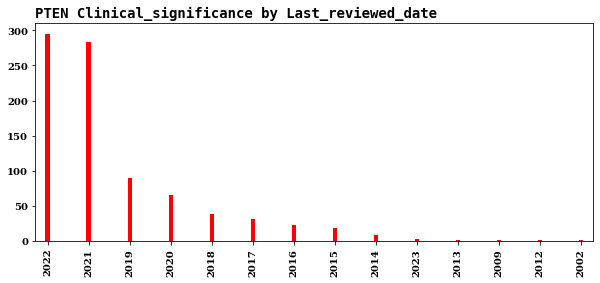

In [2]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager

font = {'family' : 'DeJavu Serif',
        'weight' : 'bold',
        'size'   : 10}

matplotlib.rc('font', **font)

x = df['Last_reviewed_year'].value_counts()
x.plot(kind='bar',figsize=(10,4), width = 0.1, color = 'r')
plt.title('PTEN Clinical_significance by Last_reviewed_date',
          fontsize='14',
    loc='left',
    fontweight='bold',
    family='monospace')

# save the plot as a PDF file
plt.savefig('figure.pdf', dpi=300, bbox_inches='tight')

In [3]:
clinical_significance = df['Clinical_significance'].value_counts(normalize = True)
clinical_significance

US          0.718277
LP          0.095460
P           0.076834
Conflict    0.065192
P/LP        0.031432
B           0.008149
LB          0.004657
Name: Clinical_significance, dtype: float64

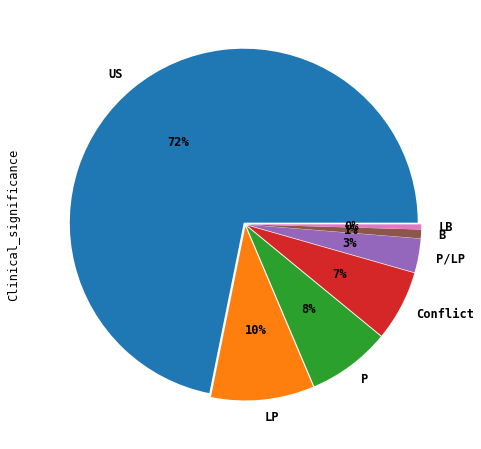

In [4]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

font = {'family' : 'monospace',
        'weight' : 'bold',
        'size'   : 12}

matplotlib.rc('font', **font)

explode = (0.0125, 0.0125, 0.0125, 0.0125, 0.0125, 0.0125, 0.0125)
clinical_significance.plot(kind='pie', autopct='%1.0f%%', explode=explode, figsize=(8, 8))
# save the plot as a PDF file
plt.savefig('pie_by_significance.pdf', dpi=300, bbox_inches='tight')

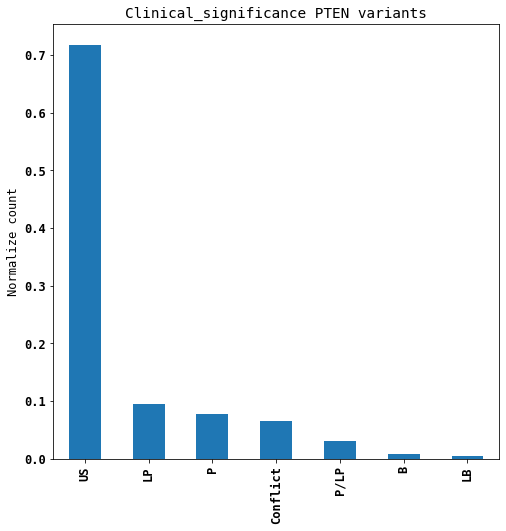

<Figure size 432x288 with 0 Axes>

In [6]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt


font = {'family' : 'monospace',
        'weight' : 'bold',
        'size'   : 12}

matplotlib.rc('font', **font)
plt.title('Clinical_significance PTEN variants')
plt.ylabel('Normalize count')
clinical_significance.plot(kind='bar', figsize=(8, 8))
plt.show()

# save the plot as a PDF file
plt.savefig('bar_by_normalize_counts.pdf', dpi=300, bbox_inches='tight')

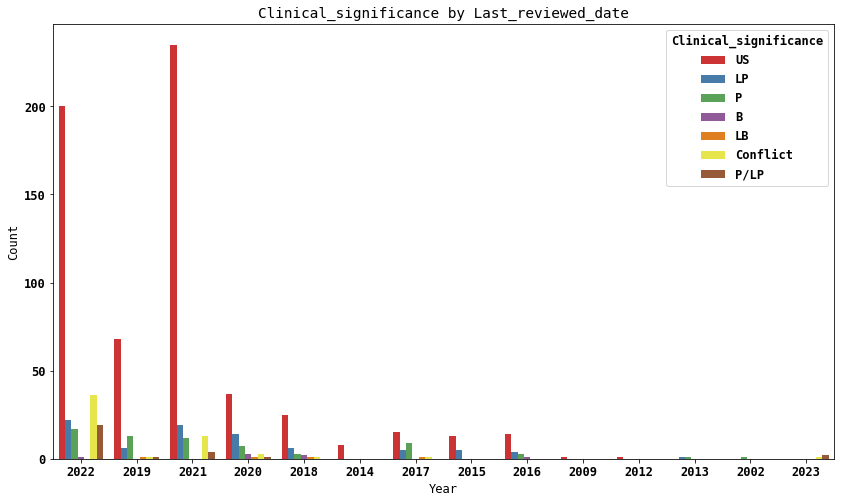

In [7]:
# Define categories for hue
categories = ['US', 'LP', ' p', 'Conflict', 'P/LP', 'B', 'Likely benign']

# Create plot
import seaborn as sns
fig, ax = plt.subplots(figsize=(14, 8))
sns.countplot(x='Last_reviewed_year', hue='Clinical_significance', data=df, palette='Set1')

font = {'family' : 'monospace',
        'weight' : 'bold',
        'size'   : 12}

matplotlib.rc('font', **font)

# Set plot title and axis labels
plt.title('Clinical_significance by Last_reviewed_date')
plt.xlabel('Year')
plt.ylabel('Count')

# Show plot
plt.show()

# save the plot as a PDF file
fig.savefig('myplot.pdf', dpi=300, bbox_inches='tight')

Replacing 'long names' describing clinical significance of variants with abbreviations such as in humsavar e.g. Uncertain significance with 'US'.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('clinvar2.csv')

In [2]:
#replacement
# Replace "Uncertain significance" with "US"
df['Clinical_significance'] = df['Clinical_significance'].replace('Uncertain significance', 'US')
# Replace "Likely pathogenic" with "LP"
df['Clinical_significance'] = df['Clinical_significance'].replace('Likely pathogenic', 'LP')
# Replace "pathogenic" with "P"
df['Clinical_significance'] = df['Clinical_significance'].replace('Pathogenic', 'P')
# Replace "Conflicting interpretations of pathogenicity" with "Conflict"
df['Clinical_significance'] = df['Clinical_significance'].replace('Conflicting interpretations of pathogenicity', 'Conflict')
# Replace "Pathogenic/Likely pathogenic" with "P/LP"
df['Clinical_significance'] = df['Clinical_significance'].replace('Pathogenic/Likely pathogenic', 'P/LP')
# Replace "Benign" with "B"
df['Clinical_significance'] = df['Clinical_significance'].replace('Benign', 'B')
# Replace "Likely benign" with "LB"
df['Clinical_significance'] = df['Clinical_significance'].replace('Likely Benign', 'LB')

In [3]:
df.to_csv('new_clinvar2.csv', index = False)

In [4]:
count = df['Clinical_significance'].value_counts()
count

US               617
LP                82
P                 66
Conflict          56
P/LP              27
B                  7
Likely benign      4
Name: Clinical_significance, dtype: int64

This next few lines deals with extracting of required columns & renaming of column names to be similar

files: 'clinvar.csv', 'gnomad_pten.csv', 'gnomad_tpmt.csv', 'humsavar_pten.csv', 'humsavar_tpmt.csv', 'pten_gof_lof.csv'

In [1]:
import pandas as pd
df = pd.read_csv('clinvar.csv')
df.head(2)

,Name,Clinical significance (Last reviewed)
0,NM_000314.8(PTEN):c.410C>G (p.Ala137Gly),"Uncertain significance(Last reviewed: Aug 22, ..."
1,NM_000314.8(PTEN):c.580T>A (p.Leu194Met),"Uncertain significance(Last reviewed: Aug 31, ..."


1st line - to extract both the gene name and the amino acid change from a string like "NM_000314.8(PTEN):c.410C>G (p.Ala137Gly)" and create two new columns, you can modify the regular expression used in the str.extract() method to capture both substrings.

2nd line - the regular expression (.*)\((.*)\) captures everything before and after the parentheses, and assigns them to separate columns in the dataframe. using regular expressions with the str.extract() method to capture the two parts of the string

3rd line - to extract just the date portion, use another str.extract() method with a regular expression pattern to capture the date.

In [2]:
# Extract two parts of the Name column using regular expressions
df[['Gene', 'HGVS']] = df['Name'].str.extract(r'\((.*?)\):.*\((.*?)\)')
# Extract two parts of the Clinical significance (Last reviewed) column using regular expressions
df[['Clinical_significance', 'Last_reviewed']] = df['Clinical significance (Last reviewed)'].str.extract('(.*)\((.*)\)')
#This will extract the date portion of the "Last_reviewed" column and create a new column called "Last_reviewed_date" containing the date strings.
df['Last_reviewed_date'] = df['Last_reviewed'].str.extract(r'(\w+\s\d+,\s\d+)')
df.head(2)

,Name,Clinical significance (Last reviewed),Gene,HGVS,Clinical_significance,Last_reviewed,Last_reviewed_date
0,NM_000314.8(PTEN):c.410C>G (p.Ala137Gly),"Uncertain significance(Last reviewed: Aug 22, ...",PTEN,p.Ala137Gly,Uncertain significance,"Last reviewed: Aug 22, 2022","Aug 22, 2022"
1,NM_000314.8(PTEN):c.580T>A (p.Leu194Met),"Uncertain significance(Last reviewed: Aug 31, ...",PTEN,p.Leu194Met,Uncertain significance,"Last reviewed: Aug 31, 2022","Aug 31, 2022"


In [3]:
df2 = df[['HGVS', 'Clinical_significance', 'Last_reviewed_date']]
df2.head(2)

,HGVS,Clinical_significance,Last_reviewed_date
0,p.Ala137Gly,Uncertain significance,"Aug 22, 2022"
1,p.Leu194Met,Uncertain significance,"Aug 31, 2022"


In [4]:
df2.to_csv('clinvar2.csv', index = False)

In [5]:
df = pd.read_csv('gnomad_pten.csv')
df.head(2)

,HGVS Consequence,ClinVar Clinical Significance
0,p.Thr2Ala,NaN
1,p.Ile28Thr,Uncertain significance


In [6]:
# Rename the 'HGVS Consequence' and 'ClinVar Clinical Significance' columns to 'HGVS' and 'Clinical_significance'
df = df.rename(columns={'HGVS Consequence': 'HGVS', 'ClinVar Clinical Significance': 'Clinical_significance'})
df.head(2)

,HGVS,Clinical_significance
0,p.Thr2Ala,NaN
1,p.Ile28Thr,Uncertain significance


In [7]:
df.to_csv('gnomad_pten2.csv', index = False)

In [8]:
df = pd.read_csv('gnomad_tpmt.csv')
df.head(2)

,Unnamed: 0,HGVS Consequence,ClinVar Clinical Significance
0,0,p.Tyr240Cys,Likely benign; other
1,1,p.Tyr240His,NaN


In [11]:
df = df[['HGVS Consequence', 'ClinVar Clinical Significance']]

In [13]:
df = df.rename(columns={'HGVS Consequence': 'HGVS', 'ClinVar Clinical Significance': 'Clinical_significance'})
df.head(2)

,HGVS,Clinical_significance
0,p.Tyr240Cys,Likely benign; other
1,p.Tyr240His,NaN


In [14]:
df.to_csv('gnomad_tpmt2.csv', index = False)

In [15]:
df = pd.read_csv('humsavar_pten.csv')
df.head(2)

,Variant,Variant class
0,p.Arg15Ser,US
1,p.Gly36Glu,US


In [16]:
df = df.rename(columns={'Variant': 'HGVS', 'Variant class': 'Clinical_significance'})
df.head(2)

,HGVS,Clinical_significance
0,p.Arg15Ser,US
1,p.Gly36Glu,US


In [17]:
df.to_csv('humsavar_pten2.csv', index = False)

In [18]:
df = pd.read_csv('humsavar_tpmt.csv')
df.head(2)

,Variant,Variant class
0,p.Leu49Ser,LB/B
1,p.Ala80Pro,LB/B


In [19]:
df = df.rename(columns={'Variant': 'HGVS', 'Variant class': 'Clinical_significance'})
df.head(2)

,HGVS,Clinical_significance
0,p.Leu49Ser,LB/B
1,p.Ala80Pro,LB/B


In [20]:
df.to_csv('humsavar_tpmt2.csv', index = False)

Obtain PTEN only required columns from pten_gof_lof.csv

In [2]:
import pandas as pd
df = pd.read_csv('pten_gof_lof.csv')
df.head(2)

,Unnamed: 0,HGVSp,Consequence
0,0,ENSP00000361021.3:p.Ser305MetfsTer7,frameshift_variant
1,1,ENSP00000361021.3:p.Gly36Arg,missense_variant


In [6]:
# Extract substring using regular expression and create a new column
df['HGVS'] = df['HGVSp'].str.extract(r':(p\.[a-zA-Z0-9]+)')
df.head(2)

,Unnamed: 0,HGVSp,Consequence,HGVS
0,0,ENSP00000361021.3:p.Ser305MetfsTer7,frameshift_variant,p.Ser305MetfsTer7
1,1,ENSP00000361021.3:p.Gly36Arg,missense_variant,p.Gly36Arg


In [9]:
df2 = df[['HGVS', 'Consequence']]
df2.head(2)

,HGVS,Consequence
0,p.Ser305MetfsTer7,frameshift_variant
1,p.Gly36Arg,missense_variant


In [10]:
df2.to_csv('pten_gof_lof2.csv', index = False)

Obtain PTEN only required columns from csv ClinVar files, gnomAD files & humsavar files

In [1]:
#load Clinvar files to merge them
import pandas as pd

# read in the two files and extract the desired columns
file1 = pd.read_csv('clinvar_PTEN.txt', sep = '\t', usecols=['Name', 'Clinical significance (Last reviewed)'])
file2 = pd.read_csv('clinvar_TPMT.txt', sep = '\t', usecols=['Name', 'Clinical significance (Last reviewed)'])

# merge the two dataframes based on the common column
result = pd.merge(file1, file2, on=['Name', 'Clinical significance (Last reviewed)'], how='left')
result.to_csv('clinvar.csv', index = False)

In [2]:
#load gnomAD files to merge them
import pandas as pd
# read in the two files and extract the desired columns
file1 = pd.read_csv('gnomAD_PTEN.csv', usecols=['HGVS Consequence', 'ClinVar Clinical Significance'])
file1.to_csv('gnomad_pten.csv', index = False)

In [3]:
df = pd.read_csv('gnomAD_TPMT.csv', usecols=['HGVS Consequence', 'ClinVar Clinical Significance'])
df.to_csv('gnomad_tpmt.csv')

In [4]:
#load gnomAD files to merge them
import pandas as pd

# read in the two files and extract the desired columns
df = pd.read_csv('humsavar_PTEN.csv', usecols=['Variant', 'Variant class'])
df.to_csv('humsavar_pten.csv', index = False)

In [5]:
df = pd.read_csv('humsavar_TPMT.csv', usecols=['Variant', 'Variant class'])
df.to_csv('humsavar_tpmt.csv', index = False)

In [6]:
#load gnomAD files to merge them
import pandas as pd

# read in the two files and extract the desired columns
file1 = pd.read_csv('gof_lof.csv', usecols=['HGVSp', 'Consequence'])
file1.to_csv('pten_gof_lof.csv')

Obtain PTEN variants from humsavar.csv

For a file like humsavar with NAs, an error message "ValueError: Cannot mask with non-boolean array containing NA / NaN values" was returned which is indicating that my DataFrame contains missing values (NaN) and the boolean indexing operation is not able to handle it.

One way to solve this is to first fill in the missing values with some value, such as an empty string (''), using the fillna() method. Here's an updated example:

In [3]:
import pandas as pd
df = pd.read_csv('humsavar.txt', sep = '\t')
df.head(2)

,Gene,Swiss_prot AC,Ftid,Variant,Variant class,dbSNP,Disease name
0,A1BG,P04217,VAR_018369,p.His52Arg,LB/B,rs893184,-
1,A1BG,P04217,VAR_018370,p.His395Arg,LB/B,rs2241788,-


In [4]:
# Fill in missing values with an empty string
df = df.fillna('')

In [5]:
pten_df = df[df['Gene'].str.contains('PTEN|TPMT')]
pten_df.to_csv('humsavar.csv', index = False)

Obtain PTEN LOF variants from goflof_HGMD2019_v032021_allfeat.csv'

In [1]:
import pandas as pd
df = pd.read_csv('goflof_HGMD2019_v032021_allfeat.csv')
df.head(2)

,ID,LABEL,CHROM,POS,Gene,RefSeq,HGVSc,HGVSp,MAX_AF,cDNA_position,...,coil_prob,Pfam_dom,DOMAINS_VEP,Clarks_distance,PTM,Phosphorylation,Acetylation,Methylation,Ubiquitination,Glycosylation
0,CD010589,LOF,12,53708608,AAAS,NM_015665.5,ENST00000209873.4:c.470_471del,ENSP00000209873.4:p.Phe157CysfsTer16,NaN,636-637/1840,...,0.040,Outside_domain,"Superfamily_domains:SSF82171,SMART_domains:SM0...",1.05664,0,0,0,0,0,0
1,CD010590,LOF,12,53701655,AAAS,NM_015665.5,ENST00000209873.4:c.1389del,ENSP00000209873.4:p.Phe464SerfsTer87,NaN,1555/1840,...,0.979,Outside_domain,"Superfamily_domains:SSF82171,hmmpanther:PTHR14...",1.05664,0,0,0,0,0,0


create a sample dataframe using boolean indexing to extract only the rows where the 'Gene' column contains either 'PTEN' or 'TPMT'. This was used for the files: goflof_HGMD2019_v032021_allfeat.csv

In [2]:
pten_df = df[df['Gene'].str.contains('PTEN|TPMT')]
pten_df.to_csv('gof_lof.csv', index = False)